# 02 Linear Q agent

#### 👉 Let's use a linear model to approximate the q-value function.

![linear_model.jpg](attachment:linear_model.jpg)

In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


## Environment 🌎

In [2]:
!pip install gymnasium
!pip install gym

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 10.4 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/CAS_AML_RL/hands_on/03_cart_pole/notebooks/')  # Add the parent directory to the path

Mounted at /content/drive


In [4]:
import gym
env = gym.make('CartPole-v1')

/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Hyperparameters

In [5]:
# Bad hyper-parameters
hparams = {
    'learning_rate': 9.214691713730938e-05,
    'discount_factor': 0.99,
    'batch_size': 32,
    'memory_size': 10000,
    'freq_steps_train': 16,
    'freq_steps_update_target': 1000,
    'n_steps_warm_up_memory': 1000,
    'n_gradient_steps': 1,
    'max_grad_norm': 1,
    'normalize_state': True,
    'epsilon_start': 0.9,
    'epsilon_end': 0.08474621504763855,
    'steps_epsilon_decay': 100000
}

SEED = 4291201652

## ⚠️ Fix random seeds

In [6]:
from src.utils import set_seed
set_seed(env, SEED)

/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


## QAgent

In [7]:
from src.q_agent import QAgent
agent = QAgent(env, **hparams)

/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation


10 parameters


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


## Train the agent 🏋️

In [8]:
from src.loops import train
train(agent, env, n_episodes=2000)

 10%|▉         | 194/2000 [00:00<00:07, 257.92it/s]/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(

 12%|█▏        | 249/2000 [00:02<00:25, 68.66it/s]

Reward mean: 9.69, std: 0.77
Num steps mean: 9.69, std: 0.77


 22%|██▏       | 432/2000 [00:03<00:09, 159.34it/s]

Reward mean: 9.69, std: 0.77
Num steps mean: 9.69, std: 0.77


 31%|███▏      | 626/2000 [00:04<00:07, 187.97it/s]

Reward mean: 9.66, std: 0.79
Num steps mean: 9.66, std: 0.79


 42%|████▏     | 830/2000 [00:04<00:05, 228.56it/s]

Reward mean: 9.72, std: 0.76
Num steps mean: 9.72, std: 0.76


 52%|█████▏    | 1038/2000 [00:05<00:04, 233.27it/s]

Reward mean: 9.72, std: 0.76
Num steps mean: 9.72, std: 0.76


 62%|██████▏   | 1246/2000 [00:06<00:03, 229.31it/s]

Reward mean: 9.72, std: 0.76
Num steps mean: 9.72, std: 0.76


 73%|███████▎  | 1451/2000 [00:07<00:02, 218.95it/s]

Reward mean: 9.72, std: 0.76
Num steps mean: 9.72, std: 0.76


 83%|████████▎ | 1663/2000 [00:08<00:01, 251.90it/s]

Reward mean: 9.72, std: 0.76
Num steps mean: 9.72, std: 0.76


 91%|█████████ | 1814/2000 [00:09<00:01, 171.14it/s]

Reward mean: 9.72, std: 0.76
Num steps mean: 9.72, std: 0.76


100%|██████████| 2000/2000 [00:10<00:00, 198.40it/s]

Reward mean: 9.66, std: 0.82
Num steps mean: 9.66, std: 0.82


## Evaluate the agent ⏱️

In [9]:
from src.loops import evaluate
rewards, steps = evaluate(
    agent, env,
    n_episodes=1000,
    epsilon=0.01
)

100%|██████████| 1000/1000 [00:01<00:00, 699.77it/s]


In [10]:
reward_avg = np.array(rewards).mean()
reward_std = np.array(rewards).std()
print(f'Reward average {reward_avg:.2f}, std {reward_std:.2f}')

Reward average 9.56, std 0.75


## Let's see how far we got in each attempt

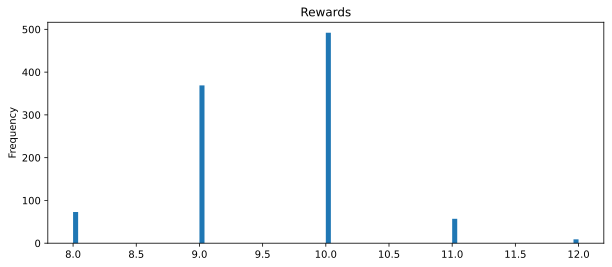

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

fig, ax = plt.subplots(figsize = (10, 4))
ax.set_title("Rewards")
pd.Series(rewards).plot(kind='hist', bins=100)

plt.show()